<a href="https://colab.research.google.com/github/shahtvisha/ImageProcessing/blob/main/HoughTransformLineDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and mask
image = cv2.imread('/content/barcode.png')


In [19]:
image.shape


(241, 555, 3)

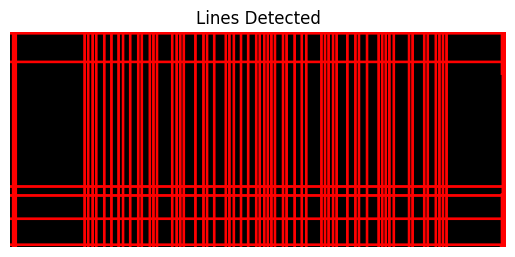

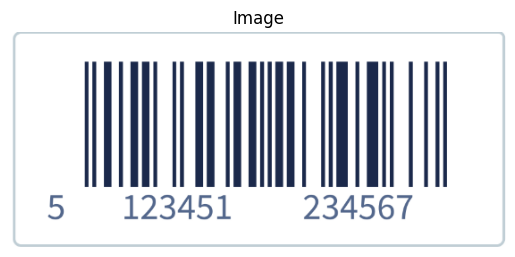

In [20]:
def hough_transform(image, threshold=100):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection using Canny
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Apply Hough Transform to detect lines
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)

    # Draw detected lines on a blank image
    lines_image = np.zeros_like(image)
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(lines_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return lines_image

lines_image = hough_transform(image)

# Plot the lines-detected image
plt.imshow(cv2.cvtColor(lines_image, cv2.COLOR_BGR2RGB))
plt.title('Lines Detected')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.axis('off')
plt.show()
